In [59]:
%matplotlib notebook

In [60]:
import networkx as nx
import numpy as np
import matplotlib as mpl

from scipy import sparse
from scipy.sparse import csr_matrix

from matplotlib import pyplot as plt
from scipy.linalg import eigh as scipy_eigh
from numpy.linalg import eigh as numpy_eigh

from mixing_result_helpers import (
    load_example_graphs, conductance, init_p0, flatten, get_relevant_matrices,
    plot_Ct_list, plot_Ct_list_in_order,
    plot_Ut_list, plot_Ut_list_in_order,
    plot_curves
)    

In [65]:
figdir = '/home/cloud-user/documents/signed-local-community/figs/lovasz-mixing/'

In [61]:
barbell_graph, line_graph, lattice, complete_graph = load_example_graphs()

# PageRank (non-personalzied)

In [62]:
seed = 0

In [63]:
def plot_C_t_in_order_for_graphs(alpha, k, step):
    fig, axes = plt.subplots(1, 5, figsize=(13, 3), gridspec_kw = {'width_ratios':[6] * 4 + [1]})
    for i, g in enumerate([barbell_graph, line_graph, lattice, complete_graph]):
        ax = axes[i]

        Wl, sock = get_relevant_matrices(g)
        p0 = init_p0(g, seed)

        plot_Ct_list_in_order(
            Wl, sock, p0, alpha, ax, log=False, k=k, step=step, cm_name='Oranges'
        )
        ax.set_title('{}'.format('{} $\phi={:.2f}$'.format(g.graph['name'], g.graph['phi'])))
        ax.set_xlabel('x')
        ax.set_ylim([0, 1.2])

    axes[0].set_ylabel('$C_t$')    
    for ax in axes[1:]:
        ax.set_ylabel('')

    cmap = mpl.cm.Oranges
    norm = mpl.colors.Normalize(vmin=0, vmax=10)

    cb1 = mpl.colorbar.ColorbarBase(axes[4], cmap=cmap,
                                    norm=norm,
                                    orientation='vertical')
    axes[4].set_ylabel('$t$')    
    return fig

def plot_U_t_in_order_for_graphs(alpha, k, step):
    fig, axes = plt.subplots(1, 5, figsize=(13, 3), gridspec_kw = {'width_ratios':[6] * 4 + [1]})
    for i, g in enumerate([barbell_graph, line_graph, lattice, complete_graph]):
        ax = axes[i]
        plot_Ut_list_in_order(
            g.number_of_edges(), g.graph['phi'], alpha, ax=ax, k=100, step=10, log=True, cm_name='Blues'
        )
        ax.set_title('{} $\phi={:.2f}$'.format(g.graph['name'], g.graph['phi']))
        ax.set_xlabel('x')

    axes[0].set_ylabel('$U_t$')    
    for ax in axes[1:]:
        ax.set_ylabel('')

    cmap = mpl.cm.Blues
    norm = mpl.colors.Normalize(vmin=0, vmax=100)

    cb1 = mpl.colorbar.ColorbarBase(axes[4], cmap=cmap,
                                    norm=norm,
                                    orientation='vertical')
    axes[4].set_ylabel('$t$')    
    return fig

<IPython.core.display.Javascript object>


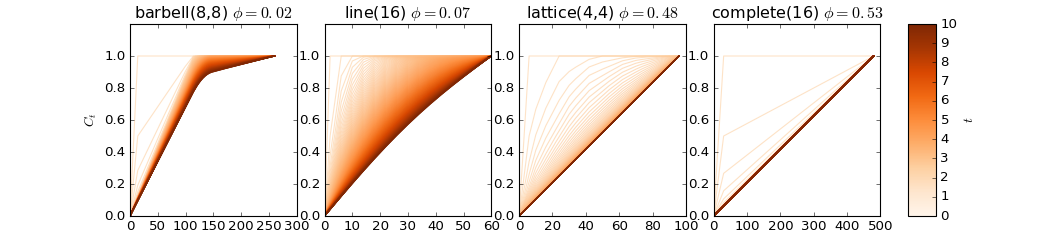

In [66]:
fig = plot_C_t_in_order_for_graphs(0, 200, 1)
fig.savefig(figdir + '/ct.png')

<IPython.core.display.Javascript object>


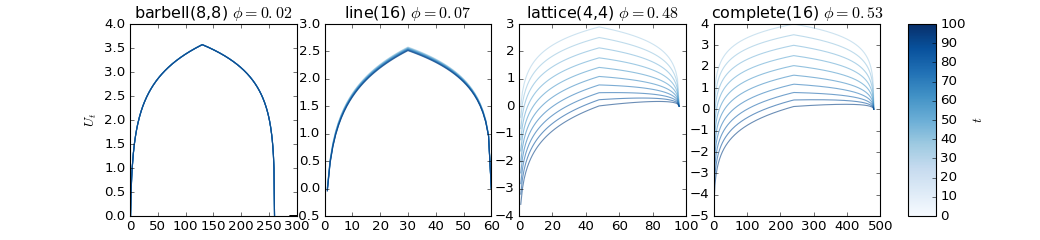

/home/cloud-user/code/signed/mixing_result_helpers.py:193: RuntimeWarning: divide by zero encountered in log2
  if log:


In [67]:
fig = plot_U_t_in_order_for_graphs(0, 1000, 1)
fig.savefig(figdir + '/ut.png')

<IPython.core.display.Javascript object>


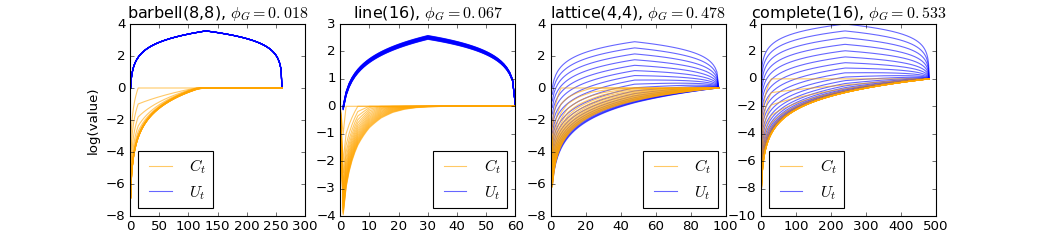

n/m=24/65
n/m=16/15
n/m=16/24


/home/cloud-user/code/signed/mixing_result_helpers.py:121: RuntimeWarning: divide by zero encountered in log2
  if log:


n/m=16/120


In [68]:
fig, axes = plt.subplots(1, 4, figsize=(13, 3))
for i, g in enumerate([barbell_graph, line_graph, lattice, complete_graph]):
    plot_curves(g, seed=0, alpha=0, k=200, step=10, use_log=True, ax=axes[i])
for ax in axes[1:]:
    ax.set_ylabel('')
fig.savefig(figdir + '/ct-and-ut.png')

# Personalized PageRank ($\alpha=0.5$)

In [56]:
alpha = 0.1

<IPython.core.display.Javascript object>


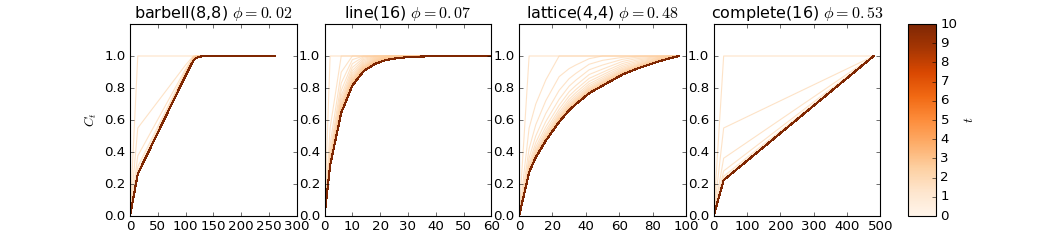

In [57]:
plot_C_t_in_order_for_graphs(alpha, 1000, 1)

<IPython.core.display.Javascript object>


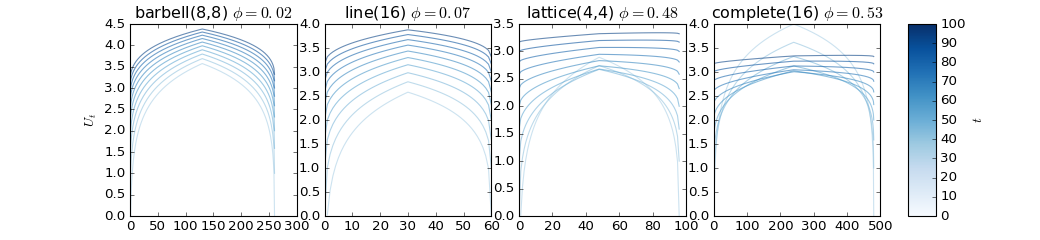

/home/cloud-user/code/signed/mixing_result_helpers.py:193: RuntimeWarning: divide by zero encountered in log2
  if log:


In [58]:
plot_U_t_in_order_for_graphs(alpha, 10, 1)

<IPython.core.display.Javascript object>


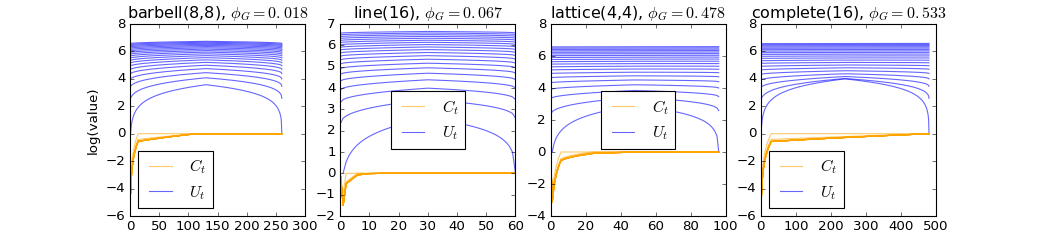

n/m=24/65
n/m=16/15
n/m=16/24
n/m=16/120


/home/cloud-user/code/signed/mixing_result_helpers.py:122: RuntimeWarning: divide by zero encountered in log2
  Ui = np.log2(Ui)


In [30]:
fig, axes = plt.subplots(1, 4, figsize=(13, 3))
for i, g in enumerate([barbell_graph, line_graph, lattice, complete_graph]):
    plot_curves(g, seed=0, alpha=alpha, k=200, step=10, use_log=True, ax=axes[i])
for ax in axes[1:]:
    ax.set_ylabel('')